<a href="https://colab.research.google.com/github/JNSDKV/Bike-sharing-demand-ML-regression-/blob/main/Bike_sharing_demand_ML_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Seoul Bike Sharing Demand Prediction



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual

# **Project Summary -**

**The introduction of rental bikes in urban cities has become a popular means of transportation for many people. It has not only enhanced mobility comfort but has also helped reduce traffic congestion and air pollution. However, ensuring that rental bikes are available and accessible to the public at the right time has become a major concern. To address this concern, this project aims to predict the bike count required at each hour for the stable supply of rental bikes.

The stable supply of rental bikes is crucial in ensuring that there is a consistent availability of rental bikes for the public. This can be achieved through the prediction of bike count required at each hour. By predicting the bike count required, bike rental companies can plan for the required number of bikes and ensure that there is no shortage or excess of rental bikes.

The prediction of bike count required at each hour involves the use of data analysis and machine learning algorithms. Historical data on bike rental usage, weather conditions, and other factors that affect bike rental usage will be analyzed. Machine learning algorithms such as regression and time series analysis will be used to analyze the data and predict the bike count required at each hour.

The project will involve the collection of data on bike rental usage, weather conditions, and other factors that affect bike rental usage. This data will be used to train the machine learning algorithms to predict the bike count required at each hour. The trained algorithms will then be used to predict the bike count required for future periods.

The project will also involve the development of a user-friendly interface that will allow bike rental companies to input data and receive predictions on the required bike count. This interface will make it easy for bike rental companies to plan for the required number of bikes and ensure that there is no shortage or excess of rental bikes.

The project will be beneficial to bike rental companies as it will help them plan for the required number of bikes and ensure that there is a stable supply of rental bikes. This will enhance the availability and accessibility of rental bikes to the public, leading to increased usage of rental bikes and reduced traffic congestion and air pollution.

In conclusion, the introduction of rental bikes in urban cities has enhanced mobility comfort, reduced traffic congestion and air pollution. However, ensuring a stable supply of rental bikes has become a major concern. This project aims to predict the bike count required at each hour for the stable supply of rental bikes. By analyzing historical data on bike rental usage, weather conditions, and other factors that affect bike rental usage, machine learning algorithms will be used to predict the bike count required at each hour. The project will be beneficial to bike rental companies and the public as it will enhance the availability and accessibility of rental bikes, leading to increased usage of rental bikes and reduced traffic congestion and air pollution.**






# **GitHub Link -**

https://github.com/JNSDKV/Bike-sharing-demand-ML-regression-

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# ignore warnings
import warnings    
warnings.filterwarnings('ignore')

# Modules for dataframe and ndarrays and maths
import pandas as pd
import numpy as np
from datetime import datetime
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew

# visualisation packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(15,6),'figure.dpi':70})

# from scikit 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData (3).csv',encoding='Unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

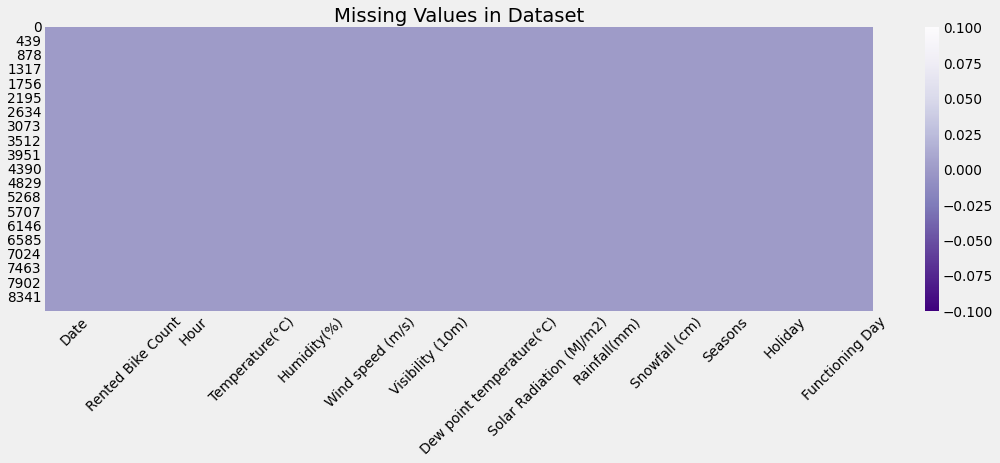

In [9]:
# Visualizing the missing values
## Checking Null Value by plotting Heatmap

plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(),cbar=True,cmap="Purples_r")
plt.xticks(rotation= 45)
plt.title('Missing Values in Dataset')
plt.show()

### What did you know about your dataset?

-> The above dataset has 8760 rows and 14 columns.  It seems that the dataset is relatively clean, as there are no mising values in the dataset. Also there are no duplicate values in the dataset. 

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns.tolist()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [11]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description 

 The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

* Date : the date in the format of year-month-day

* Rented Bike Count : the count of bikes rented at each hour

* Hour : the hour of the day

* Temperature : the temperature in Celsius

* Humidity : the percentage of humidity

* Windspeed : the wind speed in meters per second

* Visibility : the visibility in 10 meters.

* Dew Point Temperature : the dew point temperature in Celsius

* Solar Radiation : the solar radiation in MJ/m2

* Rainfall : the amount of rainfall in millimeters

* Snowfall : the amount of snowfall in centimeters

* Seasons : the season of the year, which can be Winter, Spring, Summer, or Autumn

* Holiday : whether the day is a holiday or not

* Functional Day : whether the day is a functional day (i.e., business day) or a non-functional day (i.e., weekend or holiday)
 

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .


In [13]:
print(df.apply(lambda col: col.unique()))

Date                         [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...
Rented Bike Count            [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...
Hour                         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Temperature(°C)              [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....
Humidity(%)                  [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...
Wind speed (m/s)             [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...
Visibility (10m)             [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...
Dew point temperature(°C)    [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...
Solar Radiation (MJ/m2)      [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...
Rainfall(mm)                 [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...
Snowfall (cm)                [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...
Seasons                                       [Winter, Spring, Summer, Autumn]
Holiday                                             

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready
df1 = df.copy()


In [15]:
df1.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [16]:
# lets rename some columns which contain unit in bracket which will create problem while performing task.

df1.rename(columns={'Snowfall (cm)': 'Snowfall', 'Rainfall(mm)': 'Rainfall','Solar Radiation (MJ/m2)' : 'Solar Radiation','Dew point temperature(°C)' : 'Dew point temperature', 'Visibility (10m)' : 'Visibility', 'Wind speed (m/s)' : 'Wind speed', 'Humidity(%)' : 'Humidity', 'Temperature(°C)' : 'Temperature'}, inplace=True)

In [17]:
#convert in datetime datatype
df1['Date'] = pd.to_datetime(df1['Date']) 
df1['Date']
#Seperate Day, Month, Year from DataFrame Column
df1['Day']=df1['Date'].dt.day
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year

In [18]:
# drop the Date column after extracting necessory information
df1.drop(['Date'],axis=1,inplace=True)

In [19]:
df1.head(2)

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   

   Dew point temperature  Solar Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   

      Holiday Functioning Day  Day  Month  Year  
0  No Holiday             Yes   12      1  2017  
1  No Holiday             Yes   12      1  2017

In [20]:
df1.shape

(8760, 16)

In [21]:
#Creating function to return all the unique values each categorical column can have
def cat_unique_vals(cat_cols,df1):
  for col in cat_cols:
    print("The values that the categorical column",col,"can take are:",df1[col].unique())

In [22]:
#Checking the possible values important and meaningful categorical columns can have.
categorical_columns=['Seasons','Holiday','Functioning Day']
cat_unique_vals(categorical_columns,df1)

The values that the categorical column Seasons can take are: ['Winter' 'Spring' 'Summer' 'Autumn']
The values that the categorical column Holiday can take are: ['No Holiday' 'Holiday']
The values that the categorical column Functioning Day can take are: ['Yes' 'No']


In [23]:
df1.head()

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew point temperature  Solar Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning Day  Day  Month  Year  
0  No Holiday             Yes   12      1  2017  
1  No Holiday             Yes   12      1  2017  
2  No Holiday             Yes   12      1  2017  
3  No Holiday             Yes   12      1  2017  
4  No Holiday             Yes   12      1  2017

In [24]:
df1.isnull().sum()

Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Day                      0
Month                    0
Year                     0
dtype: int64

In [25]:
df1.duplicated().sum()

0

### What all manipulations have you done and insights you found?

* I have performed some data cleaning and transformation operations on the dataset. Specifically, I have checked for missing and duplicate values and found none. I have also modified the date column by extracting the day, month, and year values and created three new columns based on this information. Finally, I have removed the original date column from the dataset.

* Many columns contain irrelevant information so renamed those columns.

* The insights or benefits of these data manipulations may include improved data quality, enhanced ability to perform analysis, and easier interpretation of results. By checking for missing and duplicate values, I have ensured that the dataset is complete and accurate, which can reduce errors in subsequent analysis. By extracting the day, month, and year values from the date column, I have created additional variables that can be used to explore trends or patterns in the data. And by removing the original date column, I have simplified the dataset and made it easier to work with.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## UNIVARIATE ANALYSIS

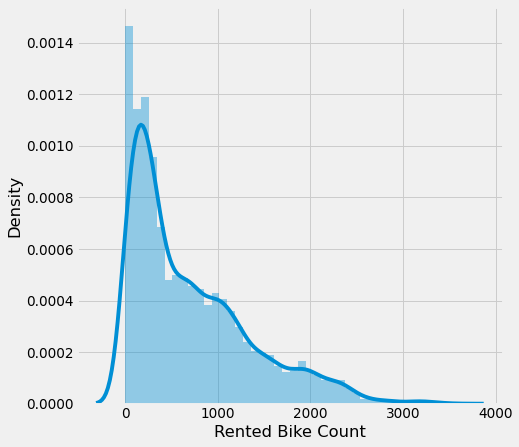

In [26]:
# Chart - 1 visualization code
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'])
plt.show()

In [27]:
df1['Rented Bike Count'].skew()

1.1534281773679014

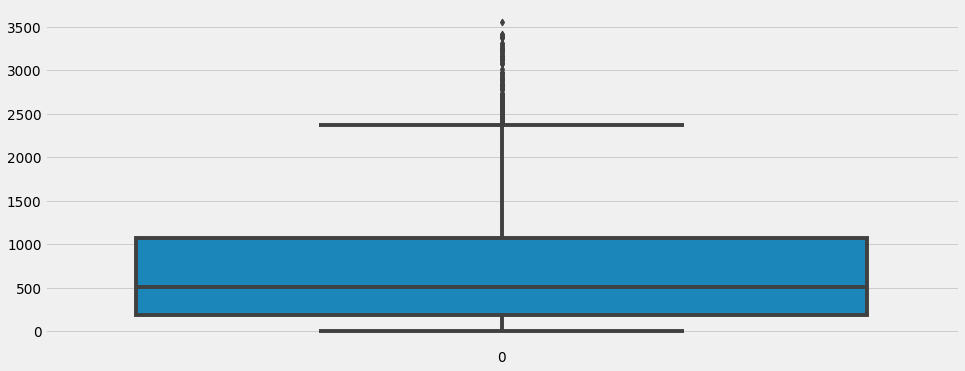

In [28]:
sns.boxplot(df1['Rented Bike Count'])
plt.show()

##### 1. Why did you pick the specific chart?

* Because for univariate analysis on numerical columns we can plot kde and boxplot to explore the distribution of data.
* This plot can also help to identify skewness and outliers.
* So i used kde and box plot on Rented Bike Count column to get the information about distribution of data.

##### 2. What is/are the insight(s) found from the chart?

* Rented Bike Count is not normally distributed.There is 1.15 skewness in this column of data .
* There is some outliers in Rented Bike Count column.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can have a positive impact on the business by helping to optimize inventory and meet demand, leading to increased profits. However, outliers and skewness in the data can have negative impacts if not addressed, such as skewness indicating peak demand periods and outliers affecting the accuracy of statistical analyses. Therefore, businesses must consider both the positive and negative impacts of the insights and take appropriate steps to address them.

#### Chart - 2

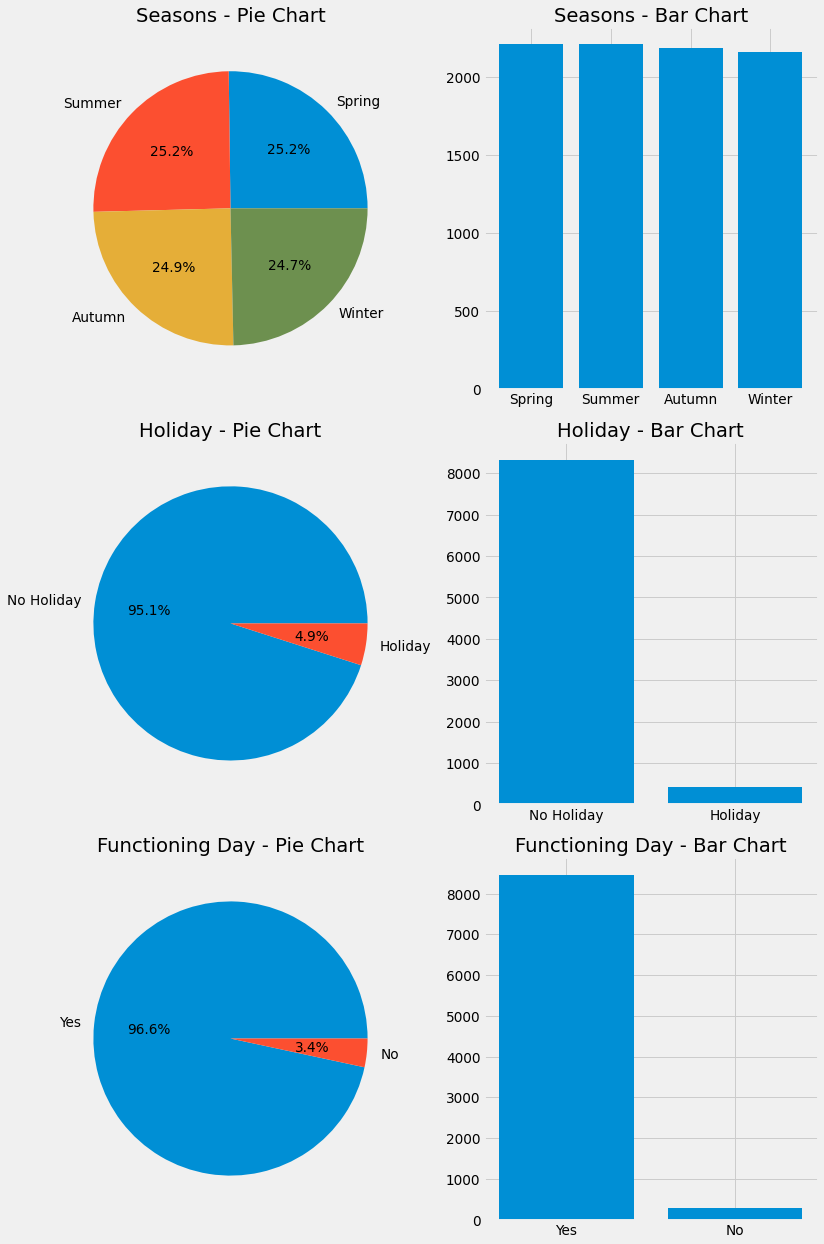

In [29]:
# Chart - 1 visualization code

import matplotlib.pyplot as plt
import numpy as np

def plot_categorical_charts(data):
    categorical_cols = data.select_dtypes(include='object').columns
    num_cols = len(categorical_cols)
    fig, axs = plt.subplots(num_cols, 2, figsize=(12, 6 * num_cols))
    
    for i, col in enumerate(categorical_cols):
        counts = data[col].value_counts()
        labels = counts.index
        values = counts.values

        # Plot the pie chart
        axs[i, 0].pie(values, labels=labels, autopct='%1.1f%%')
        axs[i, 0].set_title(f'{col} - Pie Chart')
        axs[i, 0].axis('equal')

        # Plot the bar chart
        x = np.arange(len(labels))
        axs[i, 1].bar(x, values)
        axs[i, 1].set_xticks(x)
        axs[i, 1].set_xticklabels(labels)
        axs[i, 1].set_title(f'{col} - Bar Chart')

    plt.tight_layout()
    plt.show()

# Assuming 'df' is your DataFrame
plot_categorical_charts(df1)


##### 1. Why did you pick the specific chart?

Because for univariate analysis on categorical columns we can plot barplot, pie and to explore the distribution of data.
* Bar charts and pie charts are commonly used in univariate analysis for categorical variables because they provide a visual representation of the frequency distribution of the categories. Bar charts are useful for discrete categories with a small number of values, and they use rectangular bars to represent the frequency of each category. Pie charts are useful for showing the proportion of each category in the total sample and are particularly useful when there are few categories. Overall, these charts help in identifying patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

Insights-:
* we can observed that equal number of bikes rented in each seasons.
* More number of bikes rented on no holidays almost 95%.
* In the given dataset there is almost all days are functioning days.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, gained insights help in business for growth.
* By seeing information we can say that there is more demand of rented bikes on no holidays so we can supply bikes accordingly.
* It will help that more and more customers can use this service.

#### Chart - 3 BIVARIATE ANALAYSIS

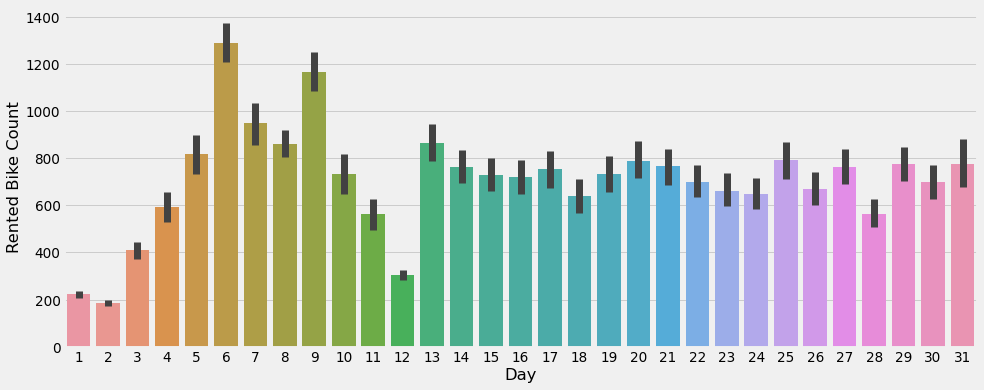

In [30]:
# Chart - 3 visualization code
sns.barplot(x='Day',y='Rented Bike Count',data=df1)
plt.show()



In [31]:
def plot_graphs(column_name):
  plt.figure(figsize=(7,7))
  #sns.distplot(df1['column_name'])
  sns.distplot(kde=True,data=df1,x=column_name,label=column_name)
  sns.catplot(kind='box',data=df1,x=column_name)
  plt.show()


In [32]:
num_columns = df1.select_dtypes(include=['float64','int64']).iloc[:,[1,2,3,4,5,6,7,8,9]].columns

In [33]:
print(num_columns)

Index(['Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility',
       'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall'],
      dtype='object')


##### 1. Why did you pick the specific chart?

Bar chart was chosen for this visualization because it effectively displays the comparison of categories (days of the month) with their corresponding frequency counts (rented bike count). The length of the bars represents the bike count, allowing for easy comparison between different days.

##### 2. What is/are the insight(s) found from the chart?

Insights-:
From the bar chart, the following insights can be derived:

* The bike counts are relatively low in the initial days of the month.
* There is a peak in bike counts at some point, indicating a period of high demand.
* After around 12 days, the bike counts stabilize and remain relatively constant.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* By seeing the demand of bikes in each day of the month bike company accordingly plane that in which day more bikes required so that supply should be properly.
* If the bike is supplied properly then company will able to win the trust of customer that will impact positively on business.

#### Chart - 4

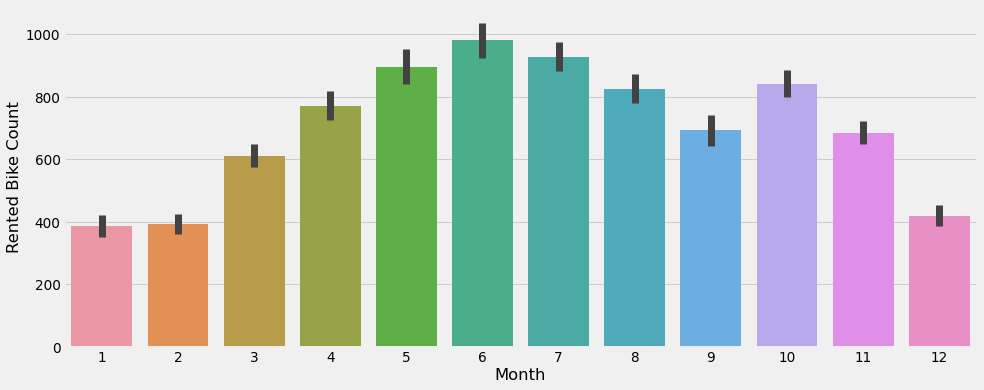

In [34]:
# Chart - 4 visualization 
sns.barplot(x='Month',y='Rented Bike Count',data=df1)
plt.show()


##### 1. Why did you pick the specific chart?

I picked up bar chart because it will help me to compare categories and corresponding frequency counts.

##### 2. What is/are the insight(s) found from the chart?

Insights-:
* Graph shows each month number how many bike were rented.
* We can see the pattern here in starting months rented bike counts was less then increases,also there is one peak in month of june.
* In starting months may be demand is less because of winter and there is more demand in the month of june.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely gained insights help to create positive impact on business.
* There is less demand of bikes in starting months so accordingly we can supply the bikes.
* From the month of march to november there is more demand of bikes, so in this duration availability of bikes should be proper so that every customer gets bike easily and give positive feedback,these feedbacks impact on business.  

#### Chart - 5

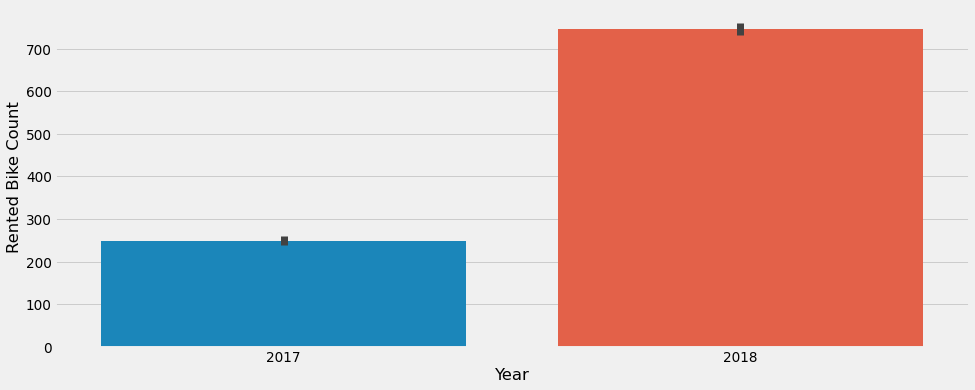

In [35]:
# Chart - 5 visualization code
#sns.scatterplot(data=df1,x='Visibility',y='Rented Bike Count')
# Chart - 5 visualization code
sns.barplot(x='Year',y='Rented Bike Count',data=df1)
plt.show()

In [36]:
#sns.scatterplot(data=df1,x='Temperature',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

* I picked up bar chart because it will help me to compare categories(YEAR) and corresponding frequency counts(Rented bike count)

##### 2. What is/are the insight(s) found from the chart?

Insights-:
* In year of 2017,number of rented bikes count was very less as compared to 2018.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight can potentially help create a positive business impact. By identifying the difference in bike counts between the two years, the business can assess the growth or decline in demand over time. This information can be used to make informed decisions about resource allocation, marketing strategies, and business expansion plans.

#### Chart - 6

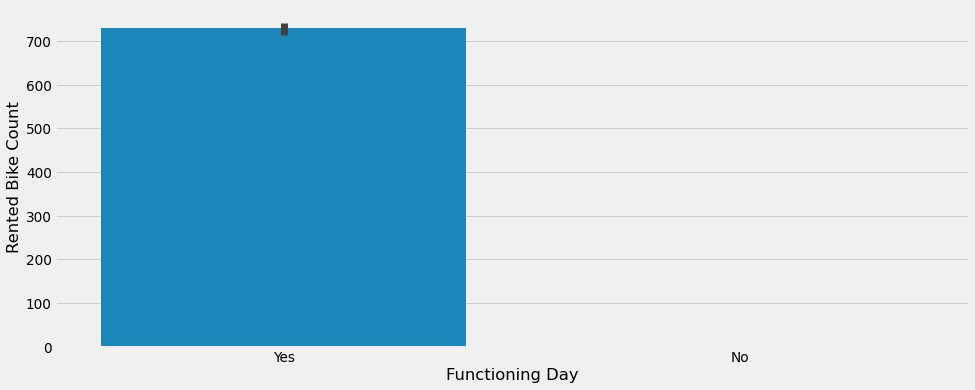

In [37]:
# Chart - 6 visualization code
#sns.barplot(data=df1,x='Seasons',y='Rented Bike Count')
sns.barplot(x=df['Functioning Day'],y=df['Rented Bike Count'])
plt.show()

##### 1. Why did you pick the specific chart?

* I picked up bar chart because it will help me to compare categories(Funtioning) and corresponding frequency counts(Rented bike count)

##### 2. What is/are the insight(s) found from the chart?

Insights-:
* chart compares between functioning day(availability of station for rented bikes) and no functioning day.
* We can clearly see that there is a direct relation between fucntioning day and rented bikes count.
* Average number of bikes rented in functioning day means when station is available for rented bikes is more than 700.
* Average number of bikes rented in no functioning day is zero.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely the gained insights help to create positive impact on business by-:
* Here we can see that functioning day(availability of station) plays major role for bike rented.
* In functioning day people are more interested to take bike for rent.
* So if company makes more functioning day then rental count will increase.

#### Chart - 7

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

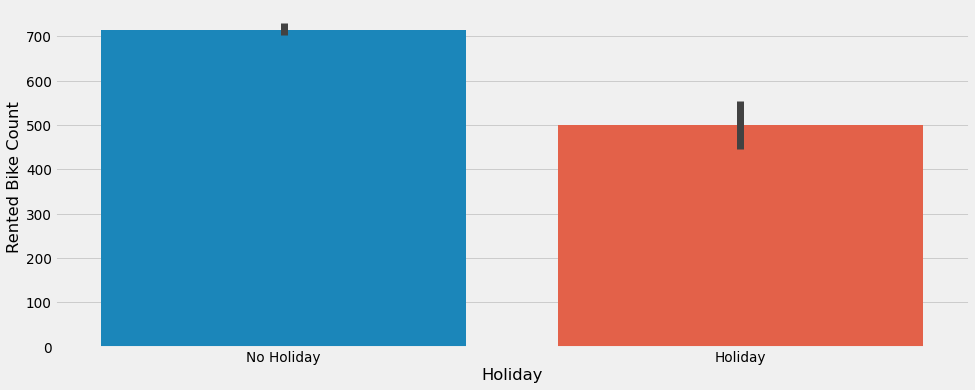

In [38]:
# Chart - 7 visualization code
sns.barplot(data=df1,x='Holiday',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

* I picked up bar chart because it will help me to compare categories and corresponding frequency counts.

##### 2. What is/are the insight(s) found from the chart?

Insights-:
* Average number of rented bikes in no holiday(approx more than 700) is more than the holiday(approx 500).
* In no holiday, people are taking more bikes for rent it may be because most of the people are using this for going to their work.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes,from gained insights we can create positive impact on business by-:
* We can see that in no hoiday number of rented bikes count are more and it obvious because many people go to their job.
* If anyhow people are more interested to take bike for rent in holiday then no of rented bikes count increases.
* This can be done through proper planing or add some offer on booking etc.By doing this it may be chance that people would like to take more bikes for rent.

#### Chart - 8

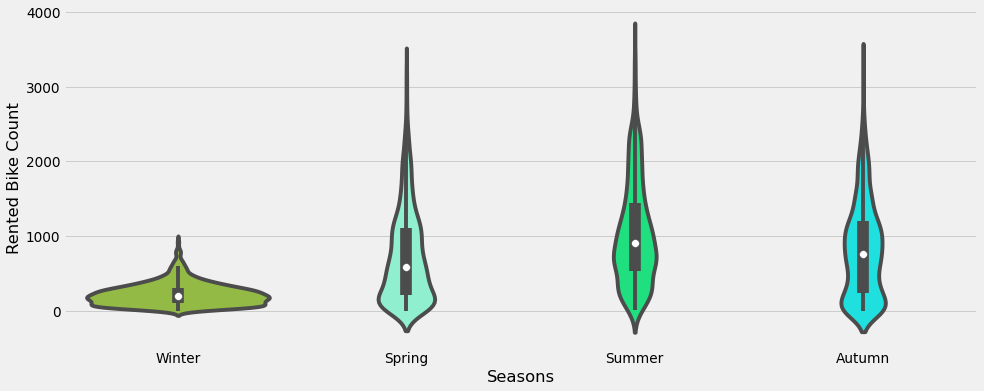

In [39]:
# Chart - 8 visualization code
#pd.crosstab(df1['Seasons'],df1['Holiday'])
sns.violinplot(x=df1['Seasons'],y=df1['Rented Bike Count'],palette =['yellowgreen','aquamarine','springgreen','aqua'])
plt.show()

##### 1. Why did you pick the specific chart?

The violin plot was likely selected because it provides a comprehensive view of the distribution of rented bike counts across seasons. It allows for the identification of any variations or trends in bike rentals, highlighting which seasons have higher or lower counts.

##### 2. What is/are the insight(s) found from the chart?

Insights-:
* More number of bike rented in the season of Summer followed by Autumn and less in Winter.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, according to insight we can plane and supply rented bikes more in the summer season.
* In the Winter people are not using rented bikes more,so we can do one thing and see whether bikes count increases or not by reducing price.
* If by reducing bike price,rented bikes count increases then we can implement that idea so it will help to grow business. 

#### Chart - 9

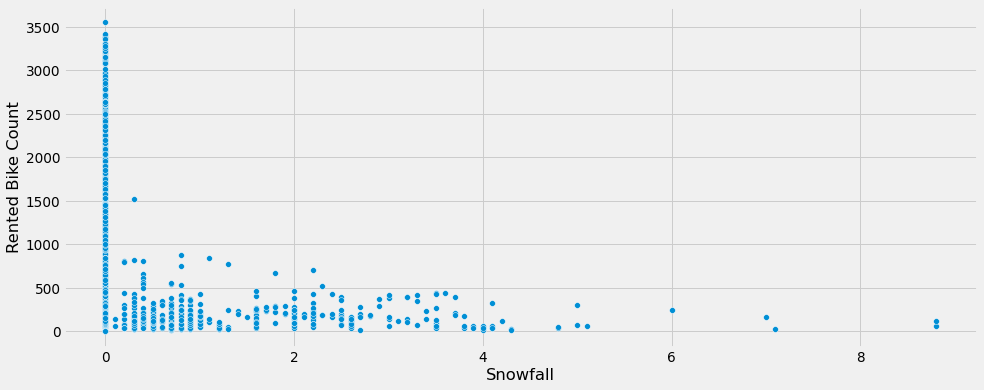

In [40]:
# Chart - 9 visualization code
#df1.corr()

sns.scatterplot(x ='Snowfall',y= 'Rented Bike Count',data = df1)
plt.show()

In [41]:
#sns.heatmap(df1.corr())
#df1.corr()['Rented Bike Count']

##### 1. Why did you pick the specific chart?

* I used scatterplot here because it gives correlation between numerical columns.

##### 2. What is/are the insight(s) found from the chart?

Insights-:
* Here we can see the correlation between Snowfall and Rented bike count.
* we observed that when there is no Snowfall then rented bike count is on the peak.But whenever there is a snowfall rented bike count decreases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

I think yes the gained insight lead to negative growth of business because we can see that there is negative correlation between Snowfall and rented bike count.
* Here rented bike count decreases during snowy season,so there is also fall in revenue of business during snowy season that lead to negative growth.

#### Chart - 10

<function matplotlib.pyplot.show(close=None, block=None)>

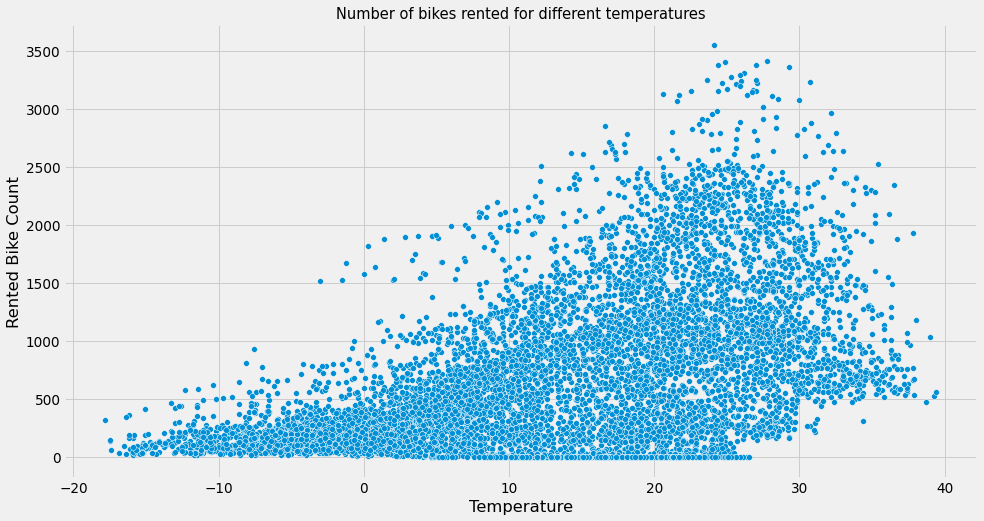

In [42]:
# Chart - 10 visualization code
plt.figure(figsize=(15,8))
sns.scatterplot(x ='Temperature', y= 'Rented Bike Count',data = df1)
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11 - MULTIVARIATE

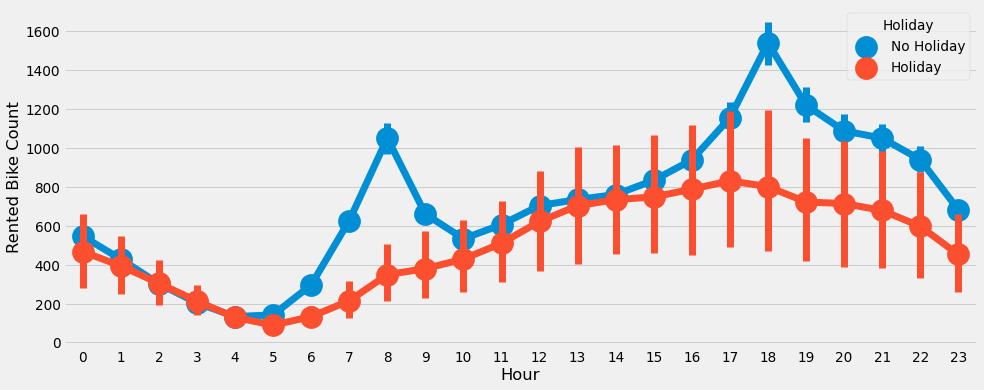

In [43]:
# Chart - 11 visualization code

#fig = plt.subplots(figsize=(15, 4))
sns.pointplot(data=df1,x='Hour',y='Rented Bike Count',hue='Holiday')
plt.show()

In [44]:
#sns.barplot(data=df1,x='Hour',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

The point plot was chosen for this visualization because it allows for the comparison of the rented bike count (y-axis) at different hours of the day (x-axis), with the added differentiation based on holidays (hue). The points and lines in the plot help show the trends and patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

From the point plot, the following insights can be derived:

* From midnight to 5:00 AM, the demand for rented bikes decreases, both on holidays and non-holidays.
* During holidays, there is an increase in demand from 5:00 AM to 6:00 PM, followed by a slight decrease.
* On non-holidays, there are two peaks of high demand: one from 5:00 AM to 8:00 AM and another from 4:00 PM to 6:00 PM. This pattern may be due to office timings or commuting patterns.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact. Understanding the demand trends at different hours and during holidays versus non-holidays can assist in resource allocation, scheduling, and service planning. By identifying the peak demand periods, the business can optimize its operations and ensure the availability of rental bikes when and where they are most needed.

Negative impact-:

 If the company unable to cater the demand at the peak hours,it has following impacts-
* Customer trust and satisfaction
* Revenue will decreases.

#### Chart - 12

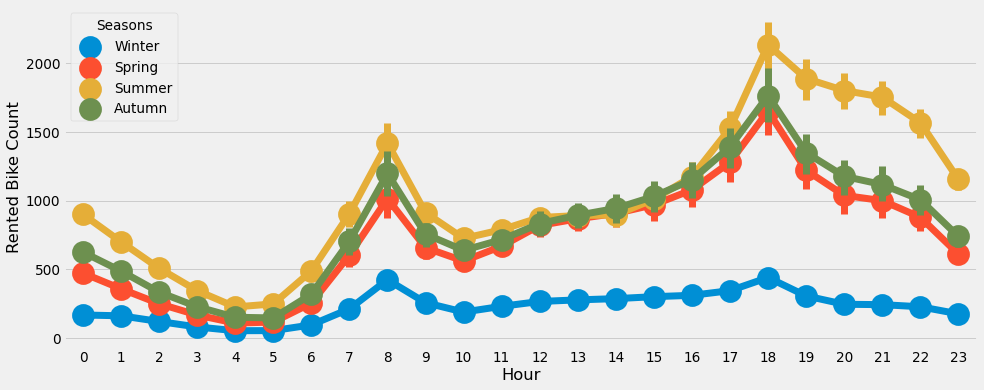

In [45]:
# Chart - 12 visualization code
# Chart - 11 visualization code
#fig = plt.subplots(figsize=(15, 4))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

The point plot was chosen for this visualization because it allows for the comparison of the rented bike count (y-axis) at different hours of the day (x-axis), with the added differentiation based on seasons (hue). The points and lines in the plot help show the trends and patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

From the point plot, the following insights can be derived:

* The demand in the winter season is generally lower compared to other seasons.
* In winter, the demand per hour remains relatively constant, with two noticeable peaks in the morning (7 to 9 AM) and evening (5 to 7 PM), potentially indicating commuting patterns during office hours.
* In the other seasons (spring, summer, and fall), the demand follows a similar trend. There are two peaks in demand: one in the morning (7 to 9 AM) and another in the evening (5 to 7 PM), which can be attributed to office hours and commuting patterns.
* The demand per hour in the summer season is generally higher compared to other seasons.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact. By understanding the demand patterns based on seasons and hours of the day, the business can optimize its operations, allocate resources effectively, and ensure sufficient availability of rental bikes during peak demand periods. For example, during the summer season, when the demand is higher, the business can plan for increased inventory and staff to meet the customer needs. However, it is important to note that the insights obtained from this chart do not indicate negative growth. They primarily provide information about demand trends, which can be leveraged to make informed decisions for positive business impact.

#### Chart - 13

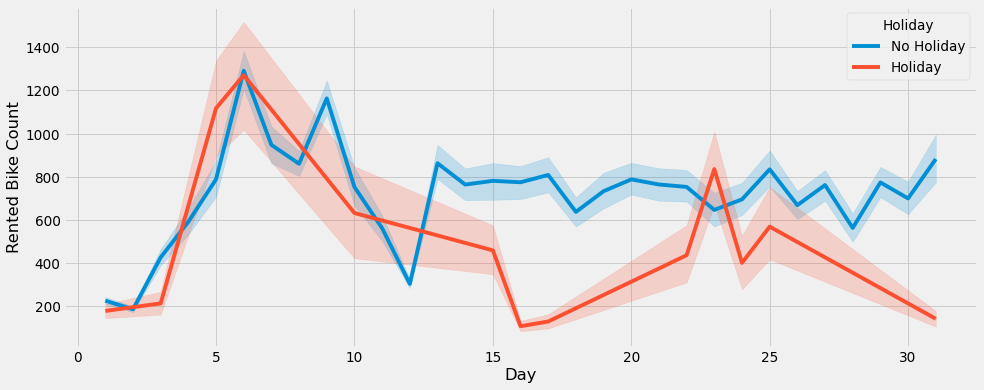

In [46]:
# Chart - 13 visualization code
#fig = plt.subplots(figsize=(15, 4))
sns.lineplot(data=df1,x='Day',y='Rented Bike Count',hue='Holiday')
plt.show()

##### 1. Why did you pick the specific chart?

The line plot was chosen for this visualization because it allows for the visualization of trends and patterns in the rented bike count (y-axis) over the course of the month (x-axis), with differentiation based on holidays (hue). The lines in the plot help show the overall trend and fluctuations in the data.

##### 2. What is/are the insight(s) found from the chart?

From the line plot, the following insights can be derived:

* In the first two weeks of the month, there is fluctuation in the demand for rented bikes on both working days and holidays. This suggests varying demand patterns during this period.
* After the initial two weeks, the demand for rented bikes is generally higher on working days compared to non-working days (holidays). This indicates that the business experiences increased demand during the latter half of the month on working days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Some of the observation company has to keep in mind to create positive impact on business-:
* In starting 2 weeks of the month company has to keep equal number of stock on both working as well as non working days.
* No need to keep stock equally after 15 days to till end of the month on working as well as holidays.

Some of the points company has to keep in mind to avoid negatively impact on business-:
* Company has to understand the monthly trend of the demand on working as well as non working days.
* If company didn't keep in mind, monthly trend of the demand, and keep number of bikes equally in holidays as well as working days then there may be chance that customer will not getting bike when demand is high.

#### Chart - 14 - Correlation Heatmap

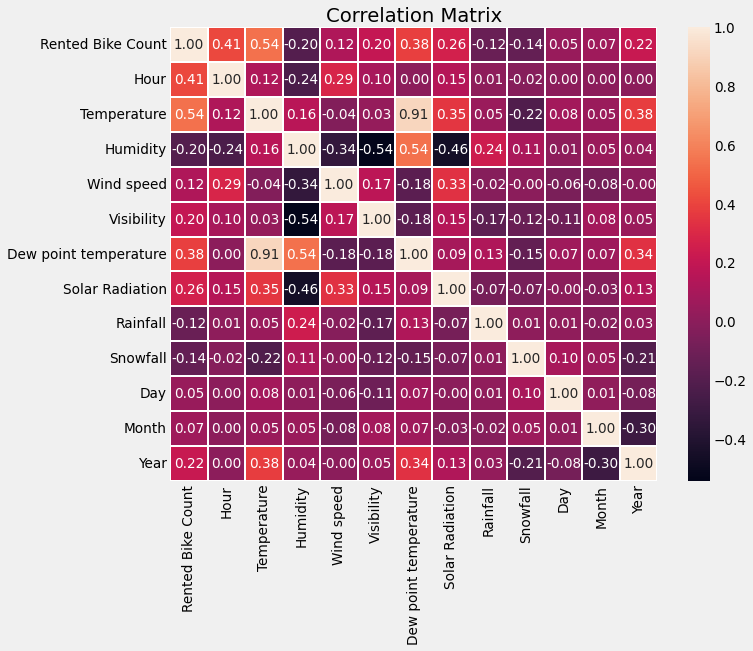

In [47]:
# Correlation Heatmap visualization code
#sns.heatmap(df1.corr())
#df1.corr()['Rented Bike Count']
#plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df1.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

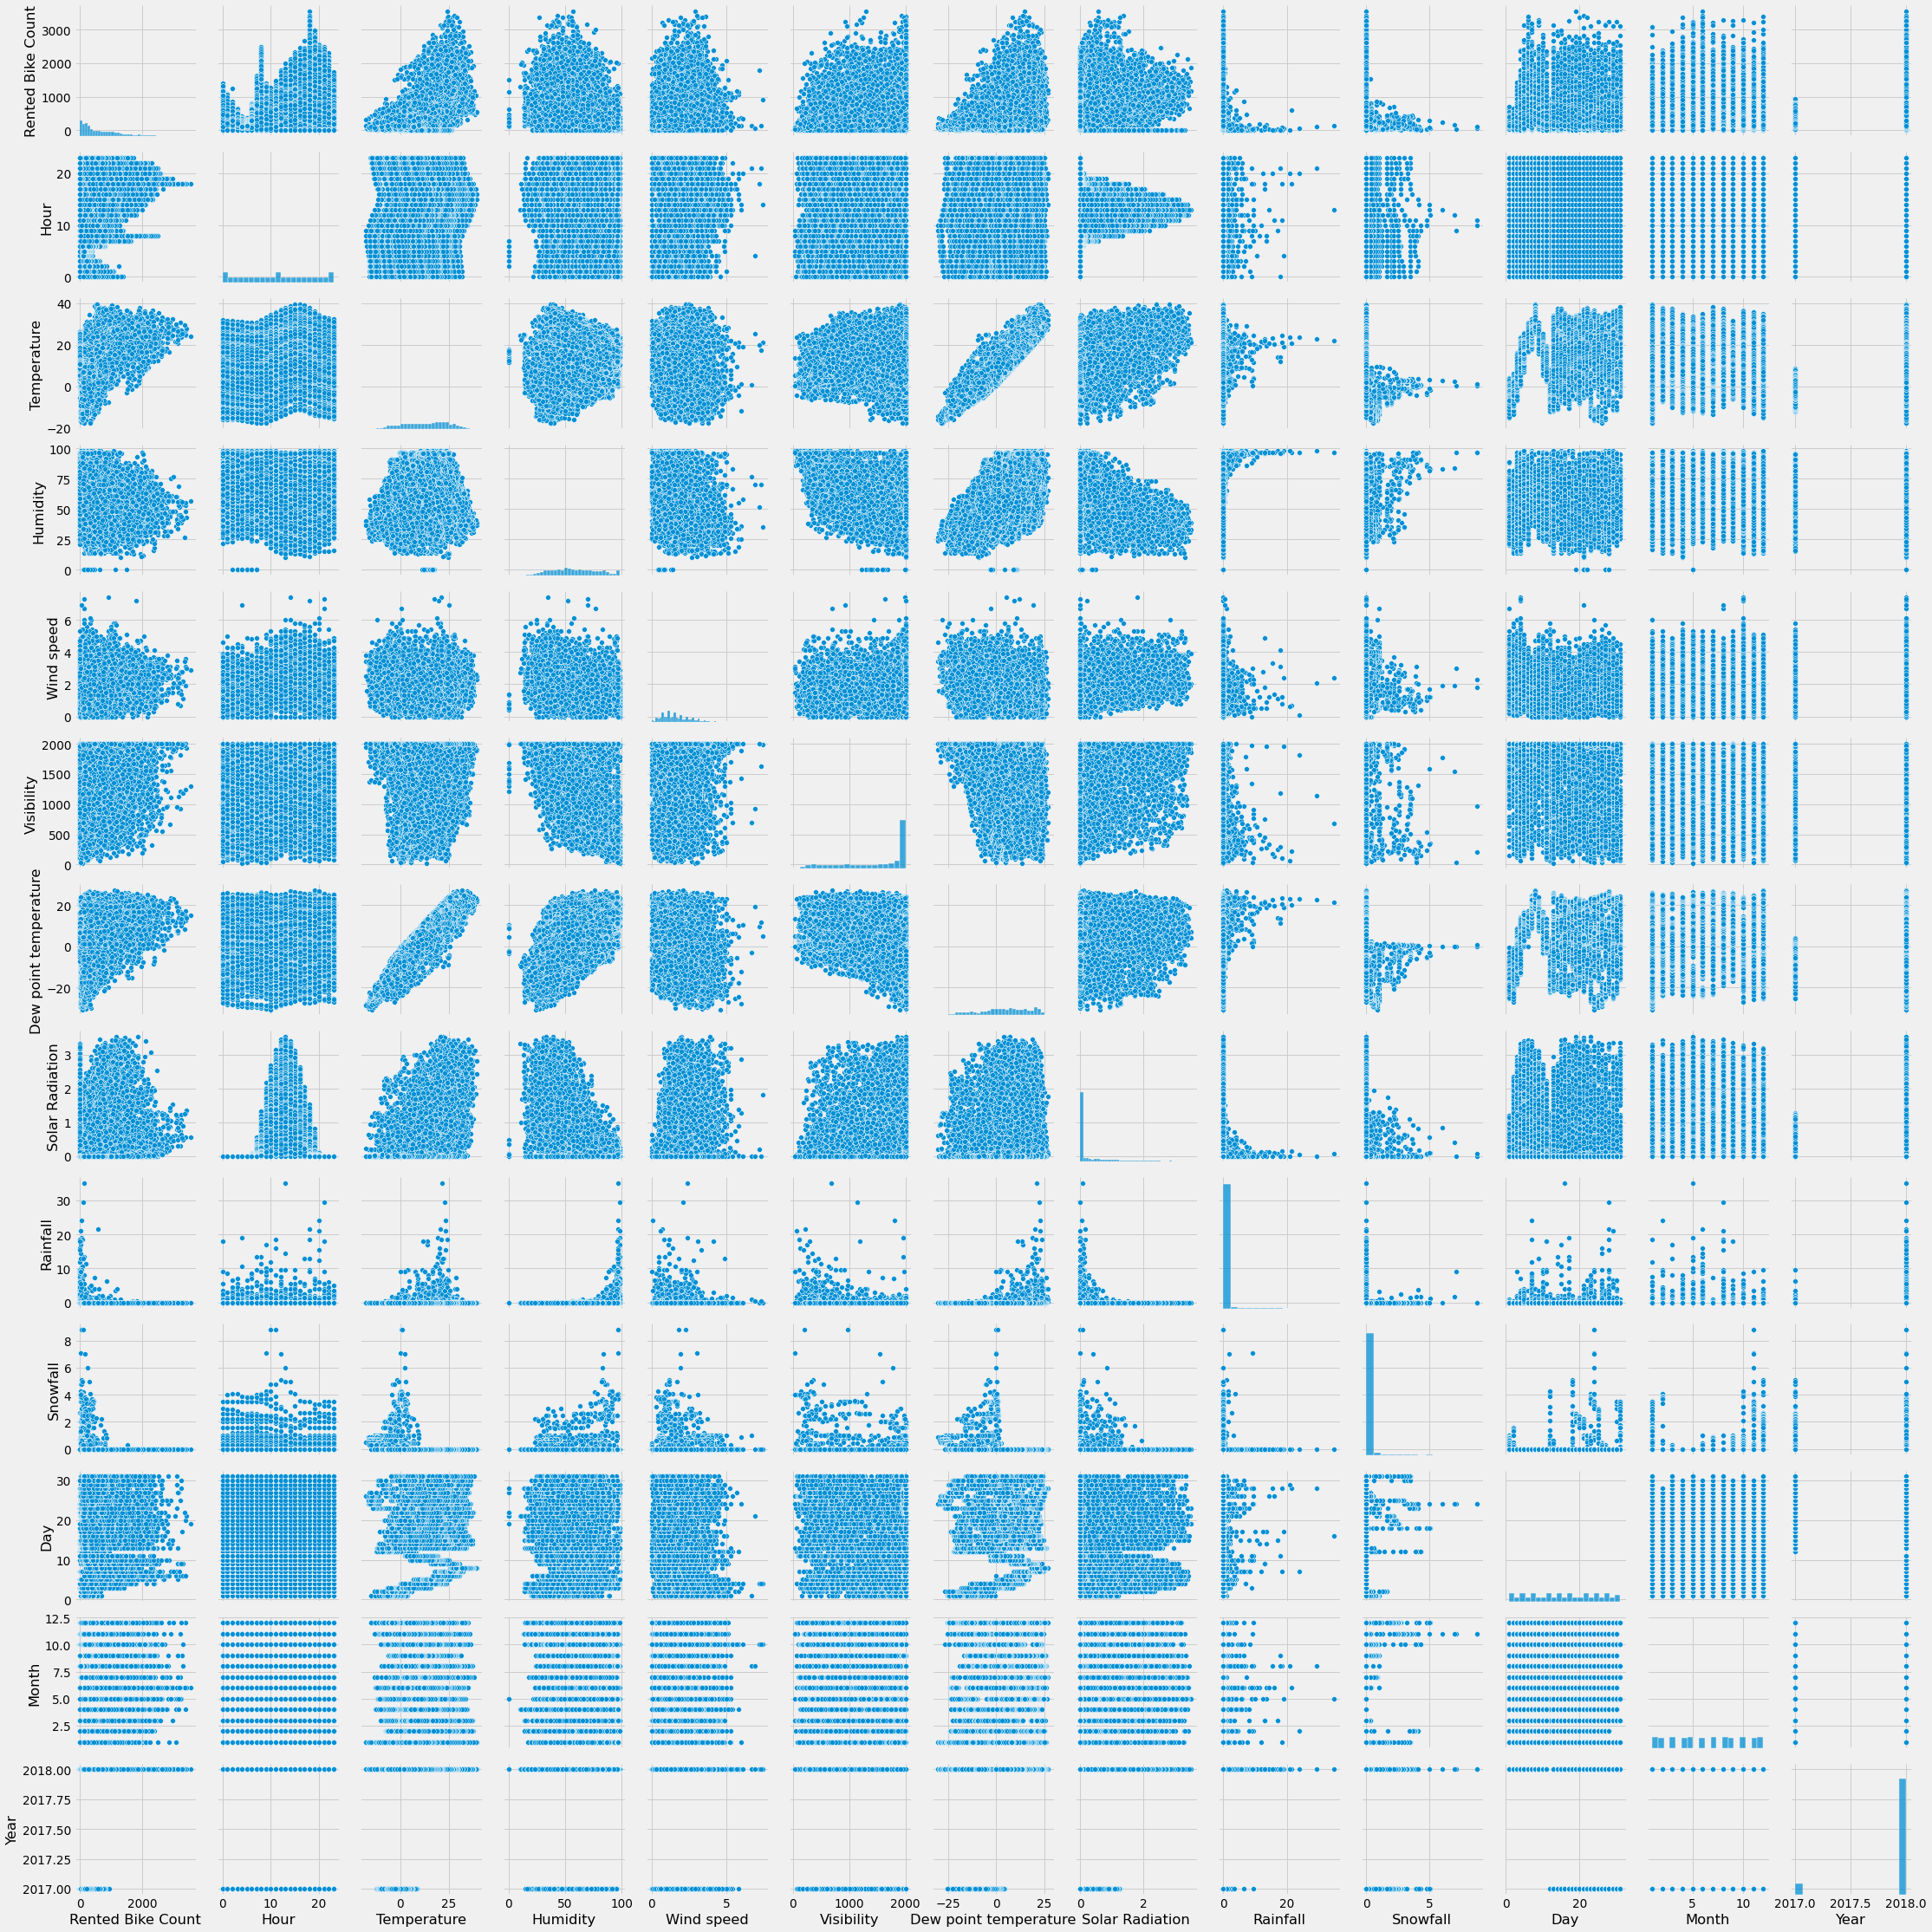

In [48]:
# Pair Plot visualization code
import seaborn as sns

# Assuming 'df' is your DataFrame
sns.pairplot(df1)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

Average number of bikes rented in a functioning day is more than 700:

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mu = 700

Alternate Hypothesis : mu < 700

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [49]:
import numpy as np
from scipy.stats import ttest_ind

# Define two samples (e.g., sample1 and sample2)
sample1 = np.array([1, 2, 3, 4, 5])
sample2 = np.array([2, 4, 6, 8, 10])

# Calculate the t-statistic and p-value
t_stat, p_value = ttest_ind(sample1, sample2)

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -1.8973665961010275
p-value: 0.09434977284243756


In [50]:
# Perform Statistical Test to obtain P-Value
# Extract the data for functioning days
#df1['Functioning Day'] = df['Functioning Day'].astype(int)
func_days_data = df[df['Functioning Day'] == 'Yes']['Rented Bike Count'].values
# Calculate the sample mean and standard deviation
sample_mean = np.mean(func_days_data)
sample_std = np.std(func_days_data, ddof=1)
# calculate the sample size
n = func_days_data.shape[0]
# set alpha level
alpha = 0.05
dof = n - 1

func_days_data.dtype
# calculate the t-statistic
null_hypothesis_mean=700
t_stat = (sample_mean - null_hypothesis_mean) / (sample_std / np.sqrt(n))

# calculate the p-value
p_value = stats.t.sf(np.abs(t_stat), dof)


# check if the p-value is less than alpha
if p_value < alpha:
    print('Reject null hypothesis. Average number of bikes rented in functioning day is more than 700.')
else:
    print('Failed to reject null hypothesis. Average number of bikes rented in functioning day is not more than 700.')

Reject null hypothesis. Average number of bikes rented in functioning day is more than 700.


##### Which statistical test have you done to obtain P-Value?

I have used t-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Average number of bikes rented in functioning day is more than 700.

##### Why did you choose the specific statistical test?

I chose the t-test because I wanted to determine if the average number of bikes rented in a functioning day is significantly different from 700. The t-test allows me to calculate the t-statistic and p-value, which provide evidence for rejecting or failing to reject the null hypothesis. It is commonly used for hypothesis testing when comparing a sample mean to a known value.

### Hypothetical Statement - 2

 In year of 2017,number of rented bikes count was very less as compared to 2018. 

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mu2017 = mu2018

Alternate Hypothesis : mu2017 > mu2018

Test Type: Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value

# Extract the number of rented bikes for 2017 and 2018
df1_2017 = df1[df1['Year'] == 2017]['Rented Bike Count'].values
df1_2018 = df1[df1['Year'] == 2018]['Rented Bike Count'].values
# Calculate the sample mean:
mean_2017 = np.mean(df1_2017)
mean_2018= np.mean(df1_2018)

# Calculate the sample standard deviations
std_2017 = df1_2017.std(ddof=1)
std_2018 = df1_2018.std(ddof=1)

# Calculate the sample sizes
n_2017 = df1_2017.shape[0]
n_2018 = df1_2018.shape[0]
# set alpha level
alpha = 0.05

# Calculate t-statistic
t_stat = (mean_2017 - mean_2018) / np.sqrt((std_2017**2/n_2017) + (std_2018**2/n_2018))

# Calculate degrees of freedom
dof1 = n_2017 + n_2018 - 2

# Calculate p-value
p_value = stats.t.cdf(t_stat, dof1)

if p_value < 0.05:
    print('Reject the null hypothesis.In year of 2017,number of rented bikes count was very less as compared to 2018')
else:
    print('Fail to reject the null hypothesis.In year of 2017,number of rented bikes count was more as compared to 2018')

Reject the null hypothesis.In year of 2017,number of rented bikes count was very less as compared to 2018


##### Which statistical test have you done to obtain P-Value?

I have used t-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and In year of 2017,number of rented bikes count was very less as compared to 2018.

##### Why did you choose the specific statistical test?

I chose the t-test because I wanted to compare the means of two groups (number of rented bikes in 2017 and 2018) and determine if there is a significant difference between them. The t-test is commonly used for this type of analysis when the sample sizes are small and the population standard deviations are unknown. It allows me to calculate the t-statistic and p-value, which provide evidence for rejecting or failing to reject the null hypothesis.

### Hypothetical Statement - 3

Demand of rented bikes in the summer season is more than the demand in other seasons.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: musummer_demand = muothers_demand

Alternate Hypothesis : musummer_demand < muothers_demand


Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value

# Extract the demand of rented bikes in summer season and in other seasons
summer_demand = df1[df1['Seasons'] == 'Summer']['Rented Bike Count'].values
others_demand = df1[df1['Seasons'] != 'Summer']['Rented Bike Count'].values

# Calculate the sample mean and standard deviation for each group
mean_summer = np.mean(summer_demand)
mean_others = np.mean(others_demand)
std_summer = np.std(summer_demand, ddof=1)
std_others = np.std(others_demand, ddof=1)

# Calculate the sample sizes
n_summer = summer_demand.shape[0]
n_others = others_demand.shape[0]

# Set the significance level
alpha = 0.05

# Calculate the degrees of freedom
dof3 = n_summer + n_others - 2

# Calculate the t-statistic
t_stat = (mean_summer - mean_others) / np.sqrt((std_summer**2/n_summer) + (std_others**2/n_others))

# Calculate the p-value
p_value =  (1 - stats.t.cdf(abs(t_stat), dof3))

if p_value < 0.05:
    print('Reject the null hypothesis.demand of rented bikes in the summer season is more than the demand in other seasons.')
else:
    print('Fail to reject the null hypothesis.demand of rented bikes in the summer season is less than the demand in other seasons.')

Reject the null hypothesis.demand of rented bikes in the summer season is more than the demand in other seasons.


##### Which statistical test have you done to obtain P-Value?

I have used t-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and demand of rented bikes in the summer season is more than the demand in other seasons.

##### Why did you choose the specific statistical test?

I chose the t-test because I wanted to determine if there is a significant difference in the demand of rented bikes between the summer season and other seasons. The t-test allows me to calculate the t-statistic and p-value, which provide evidence for rejecting or failing to reject the null hypothesis. It is commonly used for hypothesis testing when comparing the means of two groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [53]:
# Handling Missing Values & Missing Value Imputation

 **There is no missing value in the dataset.**

### 2. Handling Outliers

In [54]:
# Handling Outliers & Outlier treatments

In [55]:
df1.head(3)

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   

   Dew point temperature  Solar Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   

      Holiday Functioning Day  Day  Month  Year  
0  No Holiday             Yes   12      1  2017  
1  No Holiday             Yes   12      1  2017  
2  No Holiday             Yes   12      1  2017

In [56]:
df_num = df1.select_dtypes(['int64','float64'])
df_num

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                   254     0         -5.2        37         2.2        2000   
1                   204     1         -5.5        38         0.8        2000   
2                   173     2         -6.0        39         1.0        2000   
3                   107     3         -6.2        40         0.9        2000   
4                    78     4         -6.0        36         2.3        2000   
...                 ...   ...          ...       ...         ...         ...   
8755               1003    19          4.2        34         2.6        1894   
8756                764    20          3.4        37         2.3        2000   
8757                694    21          2.6        39         0.3        1968   
8758                712    22          2.1        41         1.0        1859   
8759                584    23          1.9        43         1.3        1909   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall  Day  Month  \
0                     -17.6              0.0       0.0       0.0   12      1   
1                     -17.6              0.0       0.0       0.0   12      1   
2                     -17.7              0.0       0.0       0.0   12      1   
3                     -17.6              0.0       0.0       0.0   12      1   
4                     -18.6              0.0       0.0       0.0   12      1   
...                     ...              ...       ...       ...  ...    ...   
8755                  -10.3              0.0       0.0       0.0   30     11   
8756                   -9.9              0.0       0.0       0.0   30     11   
8757                   -9.9              0.0       0.0       0.0   30     11   
8758                   -9.8              0.0       0.0       0.0   30     11   
8759                   -9.3              0.0       0.0       0.0   30     11   

      Year  
0     2017  
1     2017  
2     2017  
3     2017  
4     2017  
...    ...  
8755  2018  
8756  2018  
8757  2018  
8758  2018  
8759  2018  

[8760 rows x 13 columns]

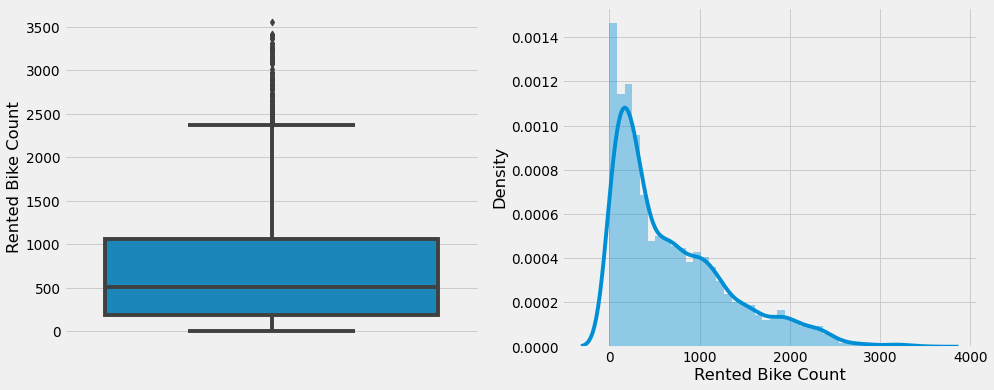

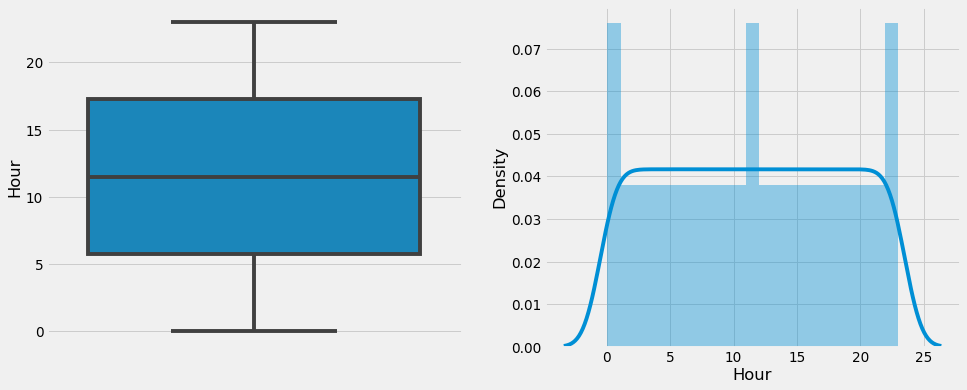

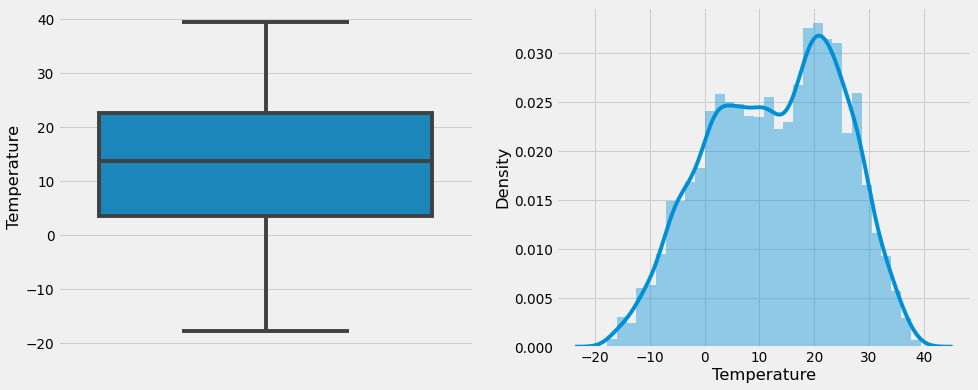

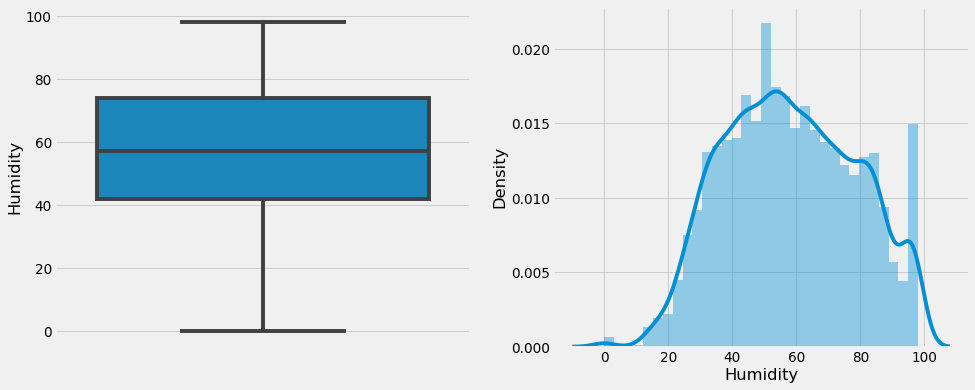

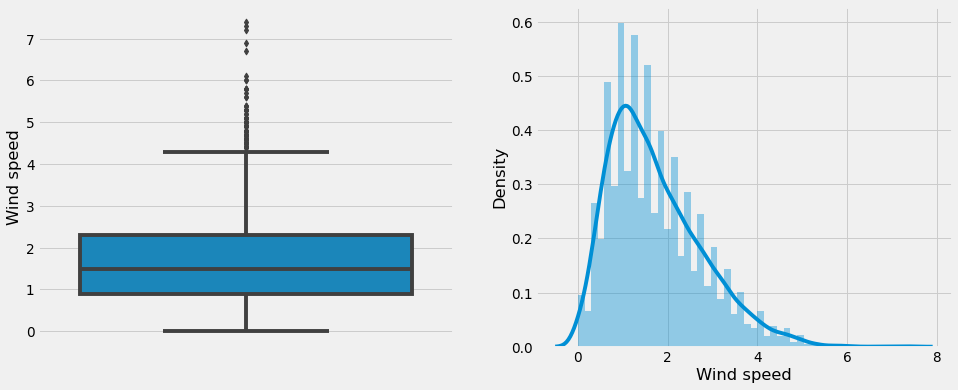

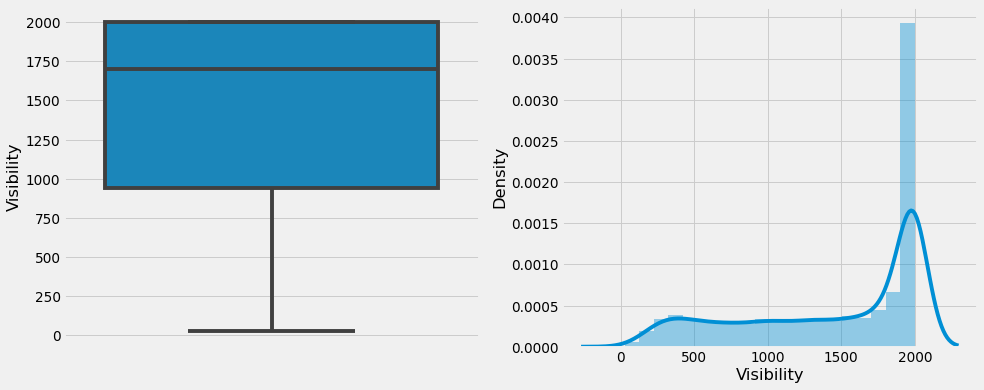

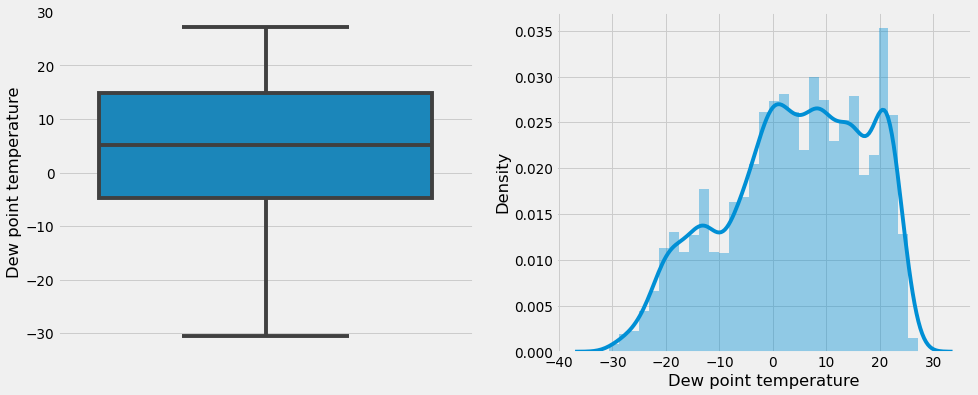

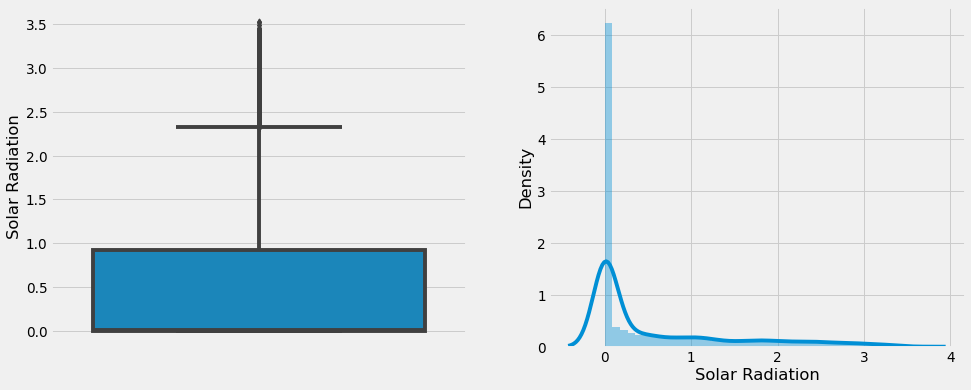

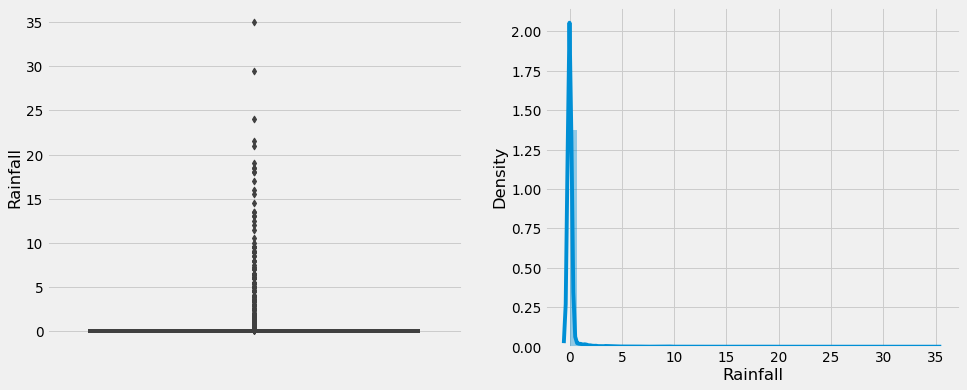

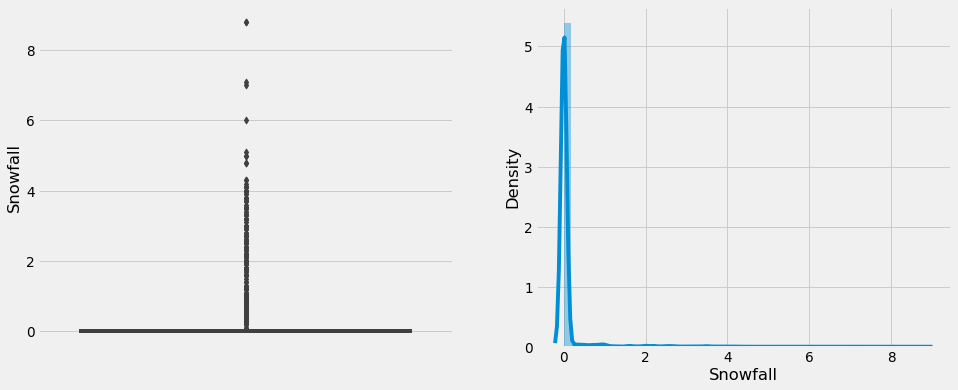

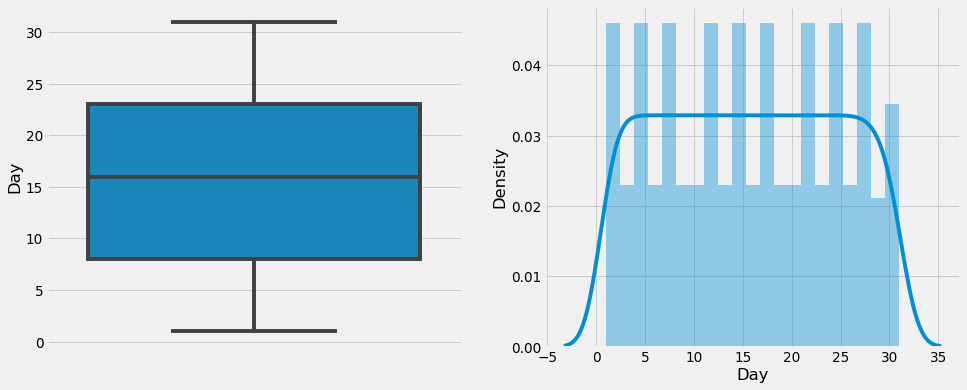

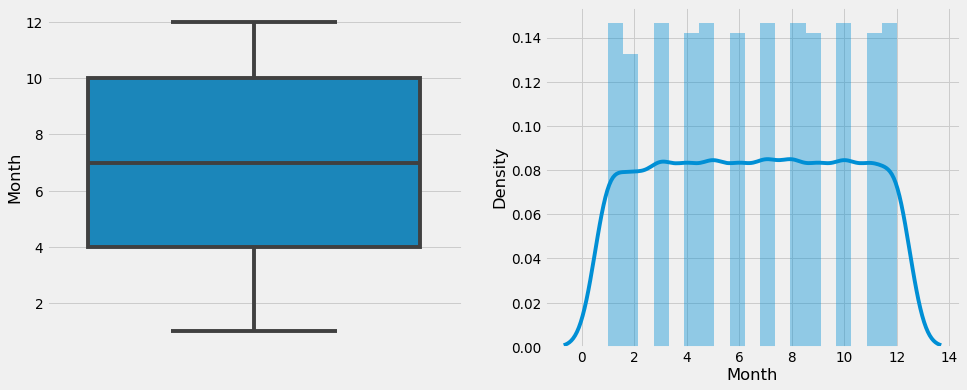

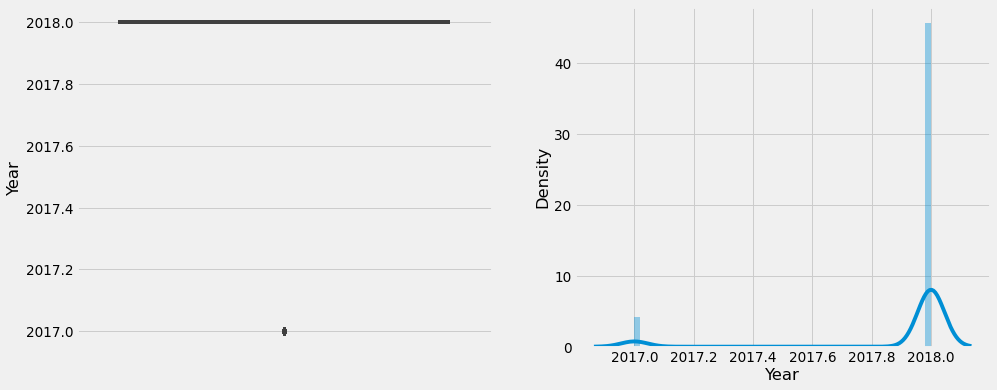

In [57]:
for var in df_num.columns:

  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=df_num[var])
  fig.set_title('')
  fig.set_ylabel(var)
    
  plt.subplot(1, 2, 2)
  fig = sns.distplot(df_num[var].dropna())
  #fig.set_ylabel('Number of houses')
  fig.set_xlabel(var)

  plt.show()

In [58]:
upper_lim = df_num['Wind speed'].quantile(.95)
lower_lim = df_num['Wind speed'].quantile(.05)
df_num.loc[(df_num["Wind speed"] > upper_lim),"Wind speed"] = upper_lim
df_num.loc[(df_num["Wind speed"] < lower_lim),"Wind speed"] = lower_lim

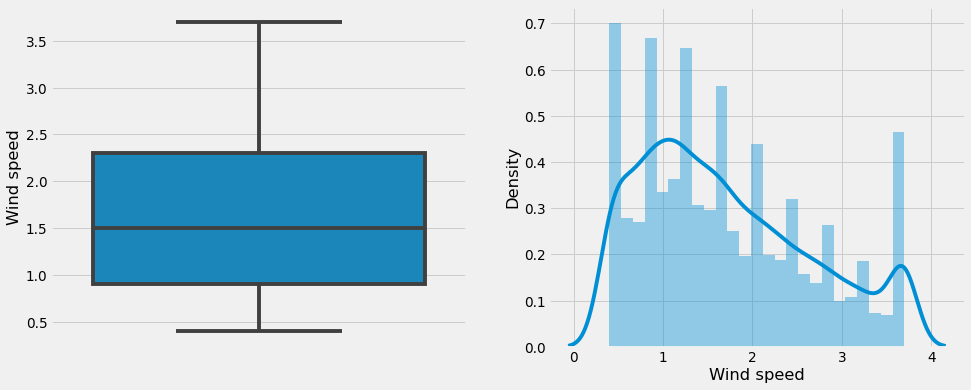

In [59]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=df_num["Wind speed"])
fig.set_title('')
fig.set_ylabel("Wind speed")
    
plt.subplot(1, 2, 2)
fig = sns.distplot(df_num["Wind speed"].dropna())
fig.set_xlabel("Wind speed")

plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [60]:
df_cat=df1.iloc[:,10:13]
print(df_cat)

     Seasons     Holiday Functioning Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]


In [61]:
# Encode your categorical 
df_cat=pd.get_dummies(df_cat,columns=['Seasons','Holiday','Functioning Day'])

In [62]:
df_cat.head(1)

Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0               0               0               0               1   

   Holiday_Holiday  Holiday_No Holiday  Functioning Day_No  \
0                0                   1                   0   

   Functioning Day_Yes  
0                    1

In [63]:
df_cat.rename(columns={'Seasons_Spring':'Seasons Spring',	'Seasons_Summer':'Seasons Summer','Seasons_Winter':'Seasons Winter','Holiday_No Holiday':'No Holiday','Functioning Day_Yes':'Functioning Day'},inplace=True)

In [64]:
df_cat.drop(['Seasons_Autumn','Holiday_Holiday','Functioning Day_No'],axis=1,inplace=True)

In [65]:
df_cat.shape

(8760, 5)

In [66]:
df_cat.head(2)

Seasons Spring  Seasons Summer  Seasons Winter  No Holiday  Functioning Day
0               0               0               1           1                1
1               0               0               1           1                1

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [67]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [68]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [69]:
# Transform Your data

### 6. Data Scaling

In [70]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [71]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [72]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [73]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [74]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [79]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [80]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [81]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [82]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [83]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***